In [145]:
import json
import numpy as np

domains = []
features = []

with open('domain-matching.20181014.decoded') as f:
    for line in f:
        record = json.loads(line.strip())       
        
        domains.extend(list(record['analysers'][0]['output'].keys()))
        features.extend(record['analysers'][-1]['output'])

In [146]:
len(domains)

14004

In [147]:
len(features)

14004

In [148]:
columns = ['NumberOfParts', 'Length', 'LongestPart', 'TLD', 'Randomness']

In [149]:
import pandas as pd

df = pd.DataFrame(data=features, columns=columns, index=domains)

In [150]:
df.shape

(14004, 5)

In [151]:
df.sample()

,NumberOfParts,Length,LongestPart,TLD,Randomness
www.sawyerrshousegivebackafrica.co.uk,4,37,27,2,0.0


In [152]:
df['NumberOfParts'].value_counts().describe()

count       6.000000
mean     2334.000000
std      2431.878862
min         5.000000
25%       109.000000
50%      2355.000000
75%      4507.250000
max      4704.000000
Name: NumberOfParts, dtype: float64

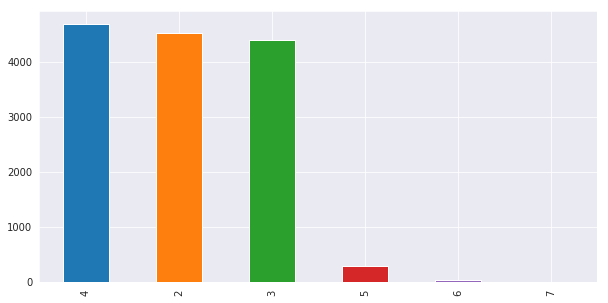

In [153]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set_style("darkgrid")

plt.figure(figsize=(10,5))
df['NumberOfParts'].value_counts().plot(kind='bar')

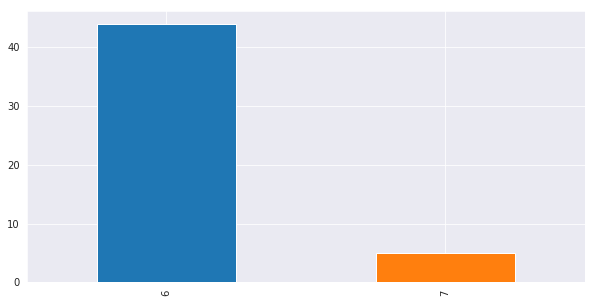

In [154]:
plt.figure(figsize=(10,5))
df.loc[df['NumberOfParts'] > 5]['NumberOfParts'].value_counts().plot(kind='bar')

In [156]:
df.loc[df['NumberOfParts'] > 5].sample()

,NumberOfParts,Length,LongestPart,TLD,Randomness
waws-prod-blu-43680001.state.p.azurewebsites.windows.net,6,56,22,3,0.0


In [157]:
df[['NumberOfParts', 'Length']].corr()

,NumberOfParts,Length
NumberOfParts,1.000000,0.604539
Length,0.604539,1.000000


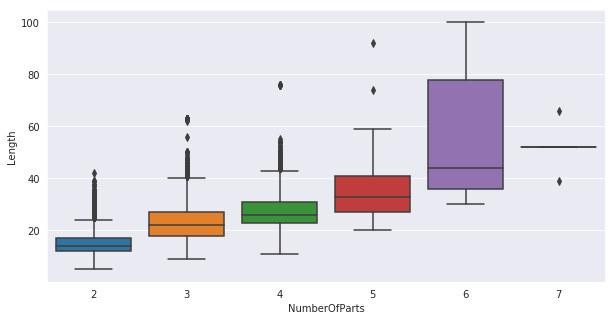

In [158]:
plt.figure(figsize=(10,5))
seaborn.boxplot(data=df, x='NumberOfParts', y='Length')

In [159]:
df.loc[df['NumberOfParts'] == 1]

,NumberOfParts,Length,LongestPart,TLD,Randomness


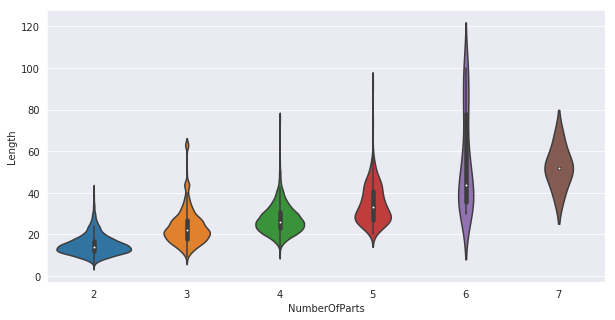

In [160]:
plt.figure(figsize=(10,5))
seaborn.violinplot(data=df, x='NumberOfParts', y='Length')

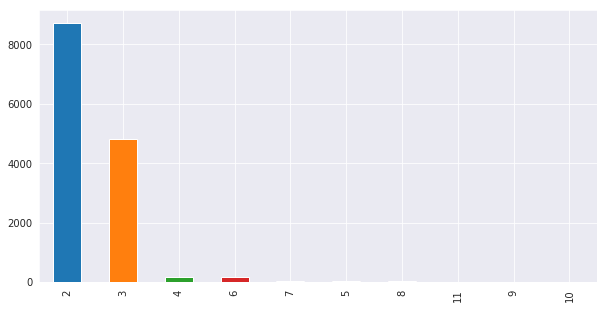

In [161]:
plt.figure(figsize=(10,5))
df['TLD'].value_counts().plot(kind='bar')

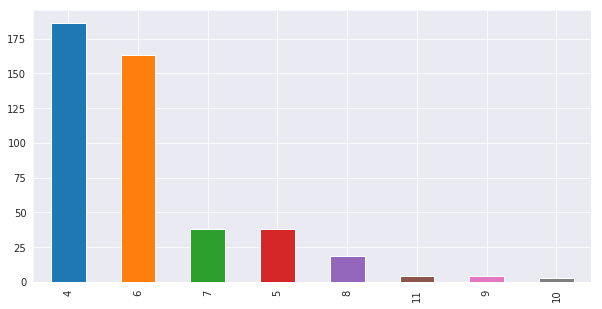

In [162]:
plt.figure(figsize=(10,5))
df.loc[df['TLD'] > 3]['TLD'].value_counts().plot(kind='bar')

In [163]:
df.loc[df['TLD'] ==  11].sample()

,NumberOfParts,Length,LongestPart,TLD,Randomness
emil.engineering,2,16,11,11,0.0
